### Es 1
Hai a disposizione un file `data.csv` contenente dati mensili di passeggeri con due colonne:

- `date`: data in formato `YYYY-MM` (mese/anno)
- `passengers`: numero di passeggeri per quel mese


Costruisci un modello di **regressione polinomiale** che approssima l’andamento del numero di passeggeri nel tempo.

1. Carica il dataset.
2. Convertilo in un formato numerico utilizzando una colonna `mese_numerico` che conti i mesi a partire da gennaio 1949.
3. Applica una regressione polinomiale (grado a tua scelta).
4. Calcola l’RMSE tra i valori reali e quelli predetti.
5. Visualizza i dati reali e la curva stimata con Plotly.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        132 non-null    object 
 1   passengers  131 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.2+ KB
Coefficiente x^3 (a): -9.779767179917248e-05
Coefficiente x^2 (b): 0.026370677638754187
Coefficiente x (c): 1.103759234198328
Intercetta (d): 116.50994252594731


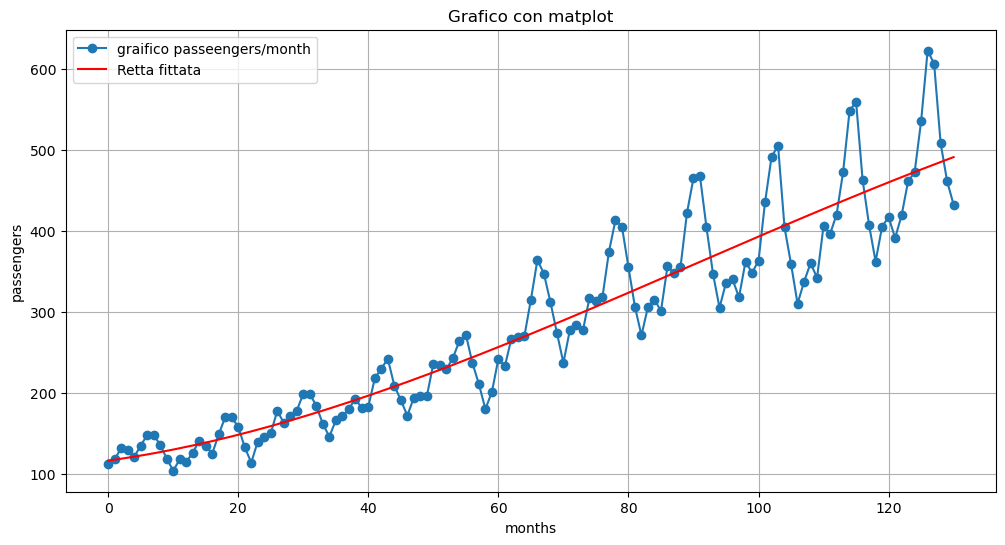

RMSE = 6.71


In [ ]:
#carico il dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

 
df = pd.read_csv('data.csv')
df.info()
df

#conversione a datetime 
df['mese_datetime']=pd.to_datetime(df['date'])
df = df.dropna()
mese_numerico = []

for i in range(len(df)):
    mese_numerico.append(i)

df['mese_numerico'] = mese_numerico

#regressione polinomiale 
x=df['mese_numerico']
y=df['passengers']

# Fitting della retta
a, b, c, d = np.polyfit(x, y, 3)  # Grado 3 per una retta

# Predizione dei valori fittati
y_fit = a * x**3  + b * x**2 + c*x +d

# Output dei parametri della retta
print(f"Coefficiente x^3 (a): {a}")
print(f"Coefficiente x^2 (b): {b}")
print(f"Coefficiente x (c): {c}")
print(f"Intercetta (d): {d}")


plt.figure(figsize=(12, 6))
plt.plot(x, y, marker='o', linestyle='-', label='graifico passeengers/month')
plt.plot(x, y_fit, label="Retta fittata", color="red")
plt.title('Grafico con matplot')
plt.xlabel('months')
plt.ylabel('passengers')
plt.legend()
plt.grid(True)
plt.show()

#calcolo RMSE 
from sklearn.metrics import root_mean_squared_error


rmse = np.sqrt(root_mean_squared_error(y, y_fit))
print(f"RMSE = {rmse:.2f}")

#visualizzazione con plotly

fig = go.Figure()

# Dati reali (punti)
fig.add_trace(go.Scatter(
    x=df['mese_numerico'],
    y=df['passengers'],
    mode='markers',
    name='Dati reali',
    marker=dict(color='blue')
))

# regressione lineeare stimata
fig.add_trace(go.Scatter(
    x=x,
    y=y_fit,
    mode='lines',
    name=f'Fit polinomiale (grado 3) RMSE: {rmse:.2f}',
    line=dict(color='red', width=2)
))

fig.update_layout(
    title='Regressione polinomiale sul numero di passeggeri -PLOTLY-',
    xaxis_title='Mesi',
    yaxis_title='Passeggeri',
    legend=dict(x=0.01, y=0.99),
    template='plotly_dark' # tema scuro per differenziare i due grafici 
)

fig.show()

### Es2. 
Costruisci una web app con Dash che permette all’utente di scegliere il grado del polinomio per adattare un modello di regressione ai dati non lineari e vedere il risultato aggiornarsi dinamicamente.


1. Genera 100 punti x tra -3 e 3.

2. Calcola ad esempio y = x³ - x + rumore.

3. Costruisci un'interfaccia Dash con:
    - uno slider per scegliere il grado del polinomio (1–10),
    - un grafico Plotly che mostra i dati e la curva stimata.

4. Usa PolynomialFeatures + LinearRegression da scikit-learn per stimare la curva

In [79]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import random

# Setup x
x = np.linspace(-3, 3, 100) #array [100]   
x_reshape = x.reshape(-1, 1) #matrici bidmensionale [100,1]

# Lista di funzioni disponibili
def f1(x): return x**3 - x
def f2(x): return x**3 - 2*x**2 + 1
def f3(x): return np.sin(2*x) * x
def f4(x): return (1 / (1 + x**2)) * x
def f5(x): return np.exp(-x**2) * x

funzioni = [f1, f2, f3, f4, f5]

# Scelta casuale della funzione + rummore
f_scelta = random.choice(funzioni)
y_true = f_scelta(x)

rumore = np.random.normal(scale=2, size=x.shape)
y = y_true + rumore

# App Dash
app = dash.Dash(__name__)
app.title = "Fit con funzione casuale"

app.layout = html.Div([
    html.H2("Regressione su funzione casuale"),
    html.P("Ad ogni esecuzione viene scelta una funzione base diversa."),
    html.Label("Grado del polinomio:"),
    dcc.Slider(
        id='grado-slider',
        min=1,
        max=10,
        step=1,
        value=1,
        marks={i: str(i) for i in range(1, 11)}
    ),
    dcc.Graph(id='grafico-fit')
])

@app.callback(
    Output('grafico-fit', 'figure'),
    Input('grado-slider', 'value')
)
def aggiorna_fit(grado):
    poly = PolynomialFeatures(degree=grado)
    x_poly = poly.fit_transform(x_reshape)
    model = LinearRegression()
    model.fit(x_poly, y)
    y_pred = model.predict(x_poly)

    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=x,
        y=y,
        mode='markers',
        name='Dati (con rumore)',
        marker=dict(color='blue')
    ))

    fig.add_trace(go.Scatter(
        x=x,
        y=y_pred,
        mode='lines',
        name=f'Fit grado {grado}',
        line=dict(color='red')
    ))

    fig.update_layout(
        title="Regressione polinomiale con funzione casuale",
        xaxis_title='x',
        yaxis_title='y',
        template='plotly_white'
    )

    return fig

# Avvio
if __name__ == '__main__':
    app.run_server(debug=True)